In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
import joblib
import xgboost as xgb


데이터셋 경로

In [3]:
default_path = '../../jiyoon/asset/default/mhcld_puf_2022.csv'
processed1_path = '../../jiyoon/asset/prepro3/단순결측치 행만 추출.csv'
processed2_path = '../../jiyoon/asset/prepro3/단순결측치 행 제거.csv'
processed3_path = '../../jiyoon/asset/prepro3/단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv'
processed4_path = '../../jiyoon/asset/prepro3/결측치가 포함된 모든 행 제거.csv'
processed5_path = '../../jiyoon/asset/prepro3/원핫인코딩_결측치가 포함된 모든 행 제거.csv'
processed6_path = '../../jiyoon/asset/prepro3/원핫인코딩_단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv'


In [3]:
default = pd.read_csv(default_path)
processed1 = pd.read_csv(processed1_path)
processed2 = pd.read_csv(processed2_path)
processed3 = pd.read_csv(processed3_path)
processed4 = pd.read_csv(processed4_path)
processed5 = pd.read_csv(processed5_path)
#processed6 = pd.read_csv(processed6_path)


In [4]:
processed6 = pd.read_csv(processed6_path)

In [5]:
print(default.shape)
print(processed1.shape)
print(processed2.shape)
print(processed3.shape)
print(processed4.shape)
print(processed5.shape)
print(processed6.shape)

(6957919, 40)
(1640309, 40)
(5317610, 40)
(5317610, 35)
(1147781, 40)
(1147781, 77)
(5317610, 69)


In [5]:
default.describe(include='all')

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
count,6957919.0,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,...,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06
mean,2022.0,6.906807e+00,-2.893766e+00,1.930815e+00,2.941775e+00,1.509873e+00,1.983040e+00,1.029606e+00,1.956536e+00,1.989749e+00,...,2.131284e-02,1.593882e-02,2.298906e-02,1.065296e-01,5.158568e-02,1.265233e-01,2.766003e+01,5.462245e+00,2.740285e+00,2.022348e+10
std,0.0,4.054777e+00,6.287160e+00,4.495802e+00,4.548226e+00,7.047036e-01,1.291224e-01,1.694973e-01,2.038982e-01,1.007286e-01,...,1.444251e-01,1.252389e-01,1.498685e-01,3.085142e-01,2.211891e-01,3.324382e-01,1.597620e+01,2.517557e+00,1.069379e+00,2.008578e+06
min,2022.0,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.022000e+10
25%,2022.0,3.000000e+00,-9.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,3.000000e+00,2.000000e+00,2.022174e+10
50%,2022.0,7.000000e+00,-9.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,5.000000e+00,3.000000e+00,2.022348e+10
75%,2022.0,1.000000e+01,4.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01,8.000000e+00,4.000000e+00,2.022522e+10
max,2022.0,1.400000e+01,5.000000e+00,4.000000e+00,6.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01,9.000000e+00,4.000000e+00,2.022696e+10


In [7]:
# 전처리 분석
def describe_dataframes(dfs):
    for name, df in dfs.items():
        print(f"{name} Data Shape: {df.shape}")
        for col in df.columns:
            print(f"{col}: {df[col].unique()}")
        print("\n\n\n")

dataframes = {
    'Default': default,
    'Processed1': processed1,
    'Processed2': processed2,
    'Processed3': processed3,
    'Processed4': processed4,
    'Processed5': processed5,
    'Processed6': processed6
}

describe_dataframes(dataframes)

Default Data Shape: (6957919, 40)
YEAR: [2022]
AGE: [14  7  8  3  4  6  5 11  9  1 12 13  2 10 -9]
EDUC: [-9  3  4  2  5  1]
ETHNIC: [ 3  4  1  2 -9]
RACE: [ 3  4 -9  2  6  5  1]
GENDER: [ 2  1 -9]
SPHSERVICE: [2 1]
CMPSERVICE: [1 2]
OPISERVICE: [2 1]
RTCSERVICE: [2 1]
IJSSERVICE: [2 1]
MH1: [11  7 -9  6 13  5  1  2  3  8  4 10  9 12]
MH2: [-9 11  2  1  3 13  7  8 10  6  5  9  4 12]
MH3: [-9  2  7  1  4  8 11 10  9  3 13  5 12  6]
SUB: [-9  6  8  3 11  4  5 10  9 13 12  7  1  2]
MARSTAT: [ 1  2  4 -9  3]
SMISED: [-9  1  3  2]
SAP: [-9  1  2]
EMPLOY: [-9  4  5  1  2  3]
DETNLF: [-9  1  2  5  3  4]
VETERAN: [-9  2  1]
LIVARAG: [-9  2  3  1]
NUMMHS: [1 2 0 3]
TRAUSTREFLG: [0 1]
ANXIETYFLG: [0 1]
ADHDFLG: [0 1]
CONDUCTFLG: [0 1]
DELIRDEMFLG: [0 1]
BIPOLARFLG: [0 1]
DEPRESSFLG: [0 1]
ODDFLG: [0 1]
PDDFLG: [0 1]
PERSONFLG: [0 1]
SCHIZOFLG: [1 0]
ALCSUBFLG: [0 1]
OTHERDISFLG: [0 1]
STATEFIP: [ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 3

In [ ]:
default.columns
processed1.columns
processed2.columns
processed3.columns
processed4.columns
processed5.columns
processed6.columns

Index(['YEAR', 'AGE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE',
       'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3', 'SAP', 'NUMMHS',
       'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
       'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
       'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP', 'CASEID', 'RACE_2',
       'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'ETHNIC_2', 'ETHNIC_3',
       'ETHNIC_4', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'SUB_1',
       'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9',
       'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'SMISED_2', 'SMISED_3',
       'DETNLF_2', 'DETNLF_3', 'DETNLF_4', 'DETNLF_5', 'DETNLF_NotApplicable',
       'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5',
       'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9'],
      dtype='object')

### 5. 진단 수가 0인 사람들: 그들은 왜 진단되지 않았는가

#### (1) 이진 분류모델 만들기

processed6을 기준으로 분석 시도. 로지스틱 회귀를 이용해보자. 

대상 데이터 들여다보기 

In [4]:
dataset6 = pd.read_csv(processed6_path)

In [ ]:
# 분석.
print(dataset6.columns)
print(dataset6.shape)
print(dataset6.describe(include='all'))

Index(['YEAR', 'AGE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE',
       'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3', 'SAP', 'NUMMHS',
       'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
       'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
       'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP', 'CASEID', 'RACE_2',
       'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'ETHNIC_2', 'ETHNIC_3',
       'ETHNIC_4', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'SUB_1',
       'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9',
       'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'SMISED_2', 'SMISED_3',
       'DETNLF_2', 'DETNLF_3', 'DETNLF_4', 'DETNLF_5', 'DETNLF_NotApplicable',
       'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5',
       'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9'],
      dtype='object')
(5317610, 69)
             YEAR           AGE        GENDER    SPHSERVICE    CMPSERVICE  \

In [ ]:
# -99의 개수
neg99_counts = (dataset6 == -99).sum()
neg99_counts = neg99_counts[neg99_counts > 0]
print(neg99_counts)

print(dataset6["SAP"].value_counts())

MH1     681464
MH2    3487662
MH3    4808751
SAP     443904
dtype: int64
SAP
 2     2886305
 1     1987401
-99     443904
Name: count, dtype: int64


이진분류모델 제작

In [ ]:
# NUMMHS로 이진 타겟 변수 만들기 => NUMMHS_binary
dataset6['NUMMHS_binary'] = dataset6['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)


X = dataset6.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])
y = dataset6["NUMMHS_binary"]


# 학습/검증 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
# 10분 걸리는군.... 


In [8]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


[[922672   4600]
 [108249  28001]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    927272
           1       0.86      0.21      0.33    136250

    accuracy                           0.89   1063522
   macro avg       0.88      0.60      0.64   1063522
weighted avg       0.89      0.89      0.86   1063522

ROC AUC: 0.7571623212088003


In [17]:
joblib.dump(model, '../result/jiyoon/logistic_model_1.pkl')

['../result/jiyoon/logistic_model_1.pkl']

In [43]:

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000,class_weight='balanced', verbose=1)
model.fit(X_train, y_train)

joblib.dump(model, '../result/jiyoon/logistic_model_2.pkl')
# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))



c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.1min finished


[[597439 329833]
 [ 39283  96967]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76    927272
           1       0.23      0.71      0.34    136250

    accuracy                           0.65   1063522
   macro avg       0.58      0.68      0.55   1063522
weighted avg       0.85      0.65      0.71   1063522

ROC AUC: 0.7648090663737236


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

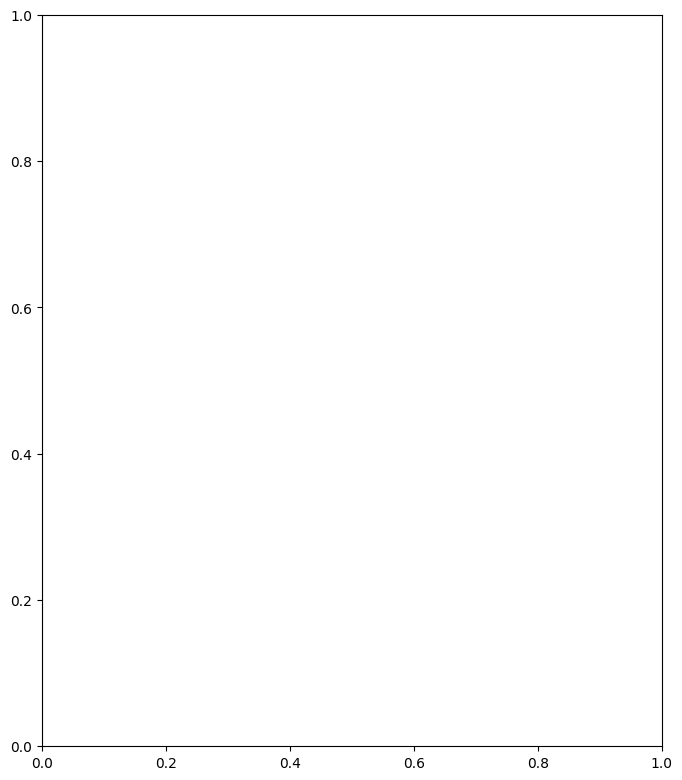

In [46]:
# 1,000개만 해석 (샘플링)
# X_test_sample = X_test.sample(n=100000, random_state=25989812)
# X_filtered = X_test_sample.loc[:, X_test_sample.nunique(dropna=False) > 1]
# X_test


# # SHAP 해석
# explainer = shap.LinearExplainer(model, X_filtered)
# shap_values = explainer(X_filtered)

# # 중요도 시각화
# shap.summary_plot(shap_values, X_filtered)


X_test_df = pd.DataFrame(X_test, columns=X.columns)  # X.columns는 학습용 컬럼
X_test_df1 = X_test_df.sample(n=1000, random_state=25989812)
explainer = shap.Explainer(model, X_test_df1)  # 또는 TreeExplainer
shap_values = explainer(X_test_df1)
shap.summary_plot(shap_values, X_test_df1)

In [22]:
print(type(shap_values))
print(type(X_test_sample))



<class 'shap._explanation.Explanation'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
print(X_test_sample.shape)   # or X_test.shape
print(X_test_sample.head())

for col in X_test_sample.columns:
    if X_test_sample[col].nunique() == 1:
        print(f"{col}: {X_test_sample[col].iloc[0]}")


(1000, 48)
              AGE  GENDER  SPHSERVICE  CMPSERVICE  OPISERVICE  RTCSERVICE  \
4875022  0.846154       1           0           1           0           0   
5204605  0.153846       0           0           1           0           0   
1102370  0.769231       0           0           1           0           0   
4027779  0.923077       1           0           1           0           0   
1706334  0.538462       0           0           1           0           0   

         IJSSERVICE  SAP  STATEFIP  RACE_2  ...  DETNLF_NotApplicable  \
4875022           0    2        49   False  ...                 False   
5204605           0    2        53   False  ...                  True   
1102370           0    1        12   False  ...                  True   
4027779           0    2        42   False  ...                  True   
1706334           0    2        18   False  ...                  True   

         DIVISION_1  DIVISION_2  DIVISION_3  DIVISION_4  DIVISION_5  \
4875022       Fa

In [38]:
# 값이 하나뿐인 컬럼 찾기
X_test_sample = X_test.sample(n=1000, random_state=25989812)

single_value_cols = X_test_sample.columns[X_test_sample.nunique(dropna=False) == 1].tolist()

# 결과 출력
print("값이 하나뿐인 컬럼:")
for col in single_value_cols:
    print(f"• {col}")

값이 하나뿐인 컬럼:


#### (2) XGboost 활용한 모델 제작

In [49]:

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_1.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[918789   8483]
 [ 91066  45184]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    927272
           1       0.84      0.33      0.48    136250

    accuracy                           0.91   1063522
   macro avg       0.88      0.66      0.71   1063522
weighted avg       0.90      0.91      0.89   1063522

ROC AUC: 0.8839582524403635


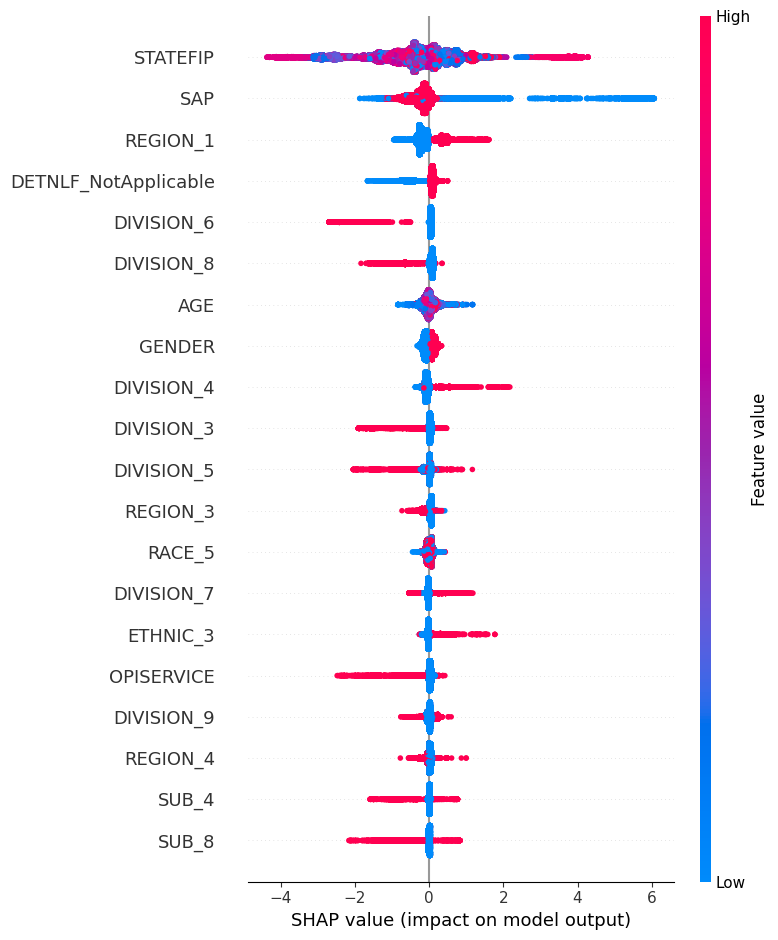

In [52]:
import shap

# 샘플을 줄여서 빠르게 해보기
X_test_sample = X_test.sample(n=100000, random_state=1)

# TreeExplainer는 트리 모델 전용이라 속도가 빠르고 정확함
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_sample)

# 요약 그래프 그리기
shap.summary_plot(shap_values, X_test_sample)


In [ ]:
# NUMMHS로 이진 타겟 변수 만들기 => NUMMHS_binary
dataset6['NUMMHS_binary'] = dataset6['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)

X = dataset6.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
    'STATEFIP', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 
    'SUB_1', 'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9', 'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13',
    'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5', 'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9'
    ])
y = dataset6["NUMMHS_binary"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_2.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[918457   8815]
 [118006  18244]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    927272
           1       0.67      0.13      0.22    136250

    accuracy                           0.88   1063522
   macro avg       0.78      0.56      0.58   1063522
weighted avg       0.86      0.88      0.84   1063522

ROC AUC: 0.7214595501366503


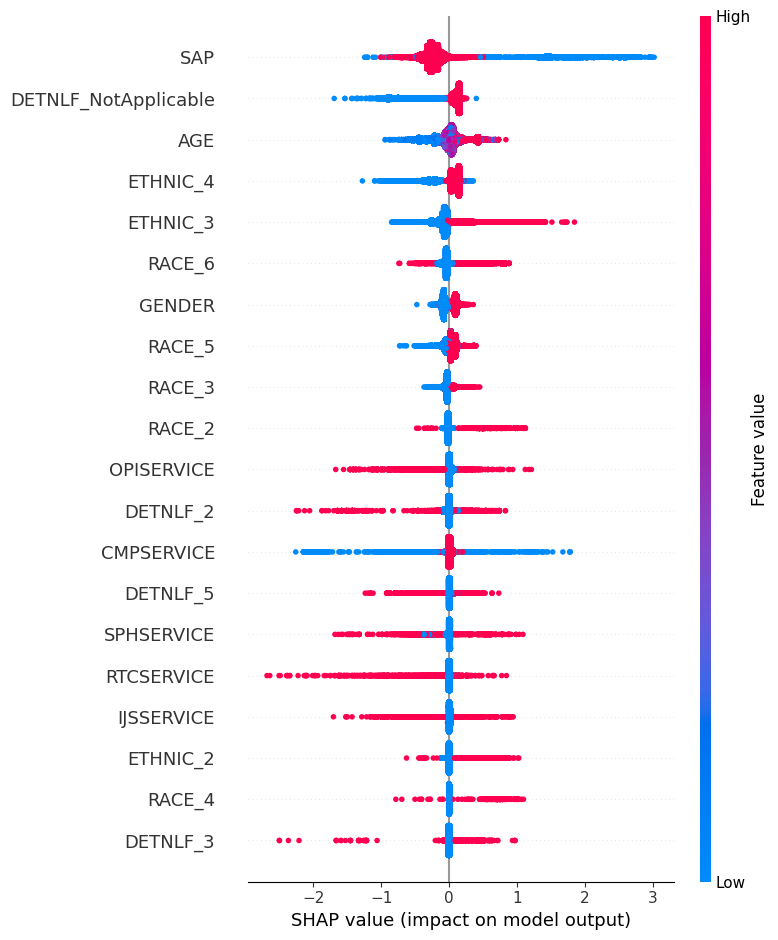

In [7]:

# 샘플을 줄여서 빠르게 해보기
X_test_sample = X_test.sample(n=100000, random_state=1)

# TreeExplainer는 트리 모델 전용이라 속도가 빠르고 정확함
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_sample)

# 요약 그래프 그리기
shap.summary_plot(shap_values, X_test_sample)

In [ ]:
default = pd.read_csv(default_path)
default['NUMMHS_binary'] = default['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)

X = default.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED",
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
    'STATEFIP'
    ])
y = default["NUMMHS_binary"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_3.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
